In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_mm10.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_mm10.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/solo_WCGW_mm10.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/wgbs_spleen_samples_savgs.csv
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_intersect.bed
/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_intersect.bed


In [2]:
df_spleen = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/wgbs_spleen_samples_savgs.csv')
df_spleen

,Unnamed: 0,chr,start,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2
0,0,chr1,72276064,72276065,79.220779,62.987013,16.233766,72.7273,85.7143,71.42860,54.5455
1,1,chr1,72275887,72275888,71.363636,78.671329,-7.307693,70.0000,72.7273,72.72730,84.6154
2,2,chr1,72276118,72276119,93.750000,81.250000,12.500000,87.5000,100.0000,87.50000,75.0000
3,3,chr1,72276126,72276127,100.000000,81.250000,18.750000,100.0000,100.0000,87.50000,75.0000
4,4,chr1,72276156,72276157,77.777778,68.571428,9.206350,100.0000,55.5556,57.14290,80.0000
...,...,...,...,...,...,...,...,...,...,...,...
19185092,19185092,chrY,9639924,9639925,70.294117,18.831169,51.462948,70.5882,70.0000,9.09091,28.5714
19185093,19185093,chrY,9640047,9640048,62.152778,5.000000,57.152778,55.5556,68.7500,10.00000,0.0000
19185094,19185094,chrY,9640439,9640440,75.000000,16.666667,58.333333,50.0000,100.0000,0.00000,33.3333
19185095,19185095,chrY,9638955,9638956,8.333334,32.500000,-24.166666,0.0000,16.6667,25.00000,40.0000


In [3]:
col_Names=["chr", "start", "end"]
df_soloCpGs = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/solo_WCGW_mm10.bed', sep='\t', names=col_Names)
df_soloCpGs

,chr,start,end
0,chr1,3001276,3001278
1,chr1,3003378,3003380
2,chr1,3005997,3005999
3,chr1,3006415,3006417
4,chr1,3008544,3008546
...,...,...,...
2998458,chr9,124490495,124490497
2998459,chr9,124493818,124493820
2998460,chr9,124493917,124493919
2998461,chr9,124494653,124494655


In [4]:
col_Names=["chr", "start", "end"]
df_PMD_soloCpGs = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/PMD_intersect.bed', sep='\t', names=col_Names)
df_PMD_soloCpGs

,chr,start,end
0,chr1,3700640,3700642
1,chr1,3702033,3702035
2,chr1,3702200,3702202
3,chr1,3702376,3702378
4,chr1,3704094,3704096
...,...,...,...
743322,chr9,114294656,114294658
743323,chr9,114294926,114294928
743324,chr9,114295626,114295628
743325,chr9,114297039,114297041


In [5]:
df_HMD_soloCpGs = pd.read_csv('/kaggle/input/wgbs-spleen-hmd-pmd-solocpgs/HMD_intersect.bed', sep='\t', names=col_Names)
df_HMD_soloCpGs

,chr,start,end
0,chr1,4802955,4802957
1,chr1,4804374,4804376
2,chr1,4806464,4806466
3,chr1,4807095,4807097
4,chr1,4808521,4808523
...,...,...,...
694824,chr9,124295726,124295728
694825,chr9,124295789,124295791
694826,chr9,124295989,124295991
694827,chr9,124298047,124298049


In [6]:
# Merge datasets according to the shared CpGs¶
from functools import reduce
data_frames = [df_spleen, df_PMD_soloCpGs]
df_soloPMD = reduce(lambda  left,right: pd.merge(left,right,on=['chr','end']), data_frames)
df_soloPMD

,Unnamed: 0,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2,start_y
0,27594,chr1,68110236,68110237,62.500000,38.068182,24.431818,50.0000,75.0000,63.63640,12.5000,68110235
1,27595,chr1,68110410,68110411,83.333334,40.000000,43.333334,66.6667,100.0000,55.00000,25.0000,68110409
2,27599,chr1,68110676,68110677,86.742424,26.736111,60.006313,81.8182,91.6667,22.22220,31.2500,68110675
3,27605,chr1,68111451,68111452,44.318182,14.880952,29.437230,25.0000,63.6364,8.33333,21.4286,68111450
4,27607,chr1,68112244,68112245,33.333334,16.666667,16.666667,0.0000,66.6667,33.33330,0.0000,68112243
...,...,...,...,...,...,...,...,...,...,...,...,...
668807,18394730,chr9,79388763,79388764,60.357143,23.823529,36.533614,60.0000,60.7143,17.64710,30.0000,79388762
668808,18394731,chr9,79388852,79388853,68.214286,28.571428,39.642858,71.4286,65.0000,42.85710,14.2857,79388851
668809,18394735,chr9,79393287,79393288,80.357143,57.142857,23.214286,85.7143,75.0000,64.28570,50.0000,79393286
668810,18394743,chr9,79391414,79391415,54.166667,0.000000,54.166667,33.3333,75.0000,0.00000,0.0000,79391413


In [7]:
# Merge datasets according to the shared CpGs¶
from functools import reduce
data_frames = [df_spleen, df_HMD_soloCpGs]
df_soloHMD = reduce(lambda  left,right: pd.merge(left,right,on=['chr','end']), data_frames)
df_soloHMD

,Unnamed: 0,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,WT_3,WT_4,Cdca7_1,Cdca7_2,start_y
0,663,chr1,72333319,72333320,75.694445,77.777778,-2.083333e+00,62.50000,88.8889,66.6667,88.88890,72333318
1,664,chr1,72333476,72333477,77.865612,67.777778,1.008783e+01,73.91300,81.8182,80.0000,55.55560,72333475
2,666,chr1,72333562,72333563,66.666667,66.666666,1.000000e-06,55.55560,77.7778,50.0000,83.33330,72333561
3,667,chr1,72333617,72333618,69.615385,82.575757,-1.296037e+01,69.23080,70.0000,83.3333,81.81820,72333616
4,683,chr1,72329833,72329834,70.129870,61.818182,8.311688e+00,85.71430,54.5455,60.0000,63.63640,72329832
...,...,...,...,...,...,...,...,...,...,...,...,...
662075,18392980,chr9,80055414,80055415,70.279720,53.921569,1.635815e+01,63.63640,76.9231,66.6667,41.17650,80055413
662076,18392984,chr9,80062976,80062977,16.666667,75.000000,-5.833333e+01,0.00000,33.3333,100.0000,50.00000,80062975
662077,18392986,chr9,80062782,80062783,74.242424,62.053572,1.218885e+01,66.66670,81.8182,81.2500,42.85710,80062781
662078,18393000,chr9,80059150,80059151,81.250000,65.151516,1.609848e+01,87.50000,75.0000,63.6364,66.66670,80059149


In [8]:
df_soloPMD_2 = df_soloPMD[["chr", "start_x", "end", "WT_avg", "Cdca7_avg", "Delta_Cdca7", "Cdca7_1", "Cdca7_2", "WT_3","WT_4"]]
df_soloPMD_2

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
0,chr1,68110236,68110237,62.500000,38.068182,24.431818,63.63640,12.5000,50.0000,75.0000
1,chr1,68110410,68110411,83.333334,40.000000,43.333334,55.00000,25.0000,66.6667,100.0000
2,chr1,68110676,68110677,86.742424,26.736111,60.006313,22.22220,31.2500,81.8182,91.6667
3,chr1,68111451,68111452,44.318182,14.880952,29.437230,8.33333,21.4286,25.0000,63.6364
4,chr1,68112244,68112245,33.333334,16.666667,16.666667,33.33330,0.0000,0.0000,66.6667
...,...,...,...,...,...,...,...,...,...,...
668807,chr9,79388763,79388764,60.357143,23.823529,36.533614,17.64710,30.0000,60.0000,60.7143
668808,chr9,79388852,79388853,68.214286,28.571428,39.642858,42.85710,14.2857,71.4286,65.0000
668809,chr9,79393287,79393288,80.357143,57.142857,23.214286,64.28570,50.0000,85.7143,75.0000
668810,chr9,79391414,79391415,54.166667,0.000000,54.166667,0.00000,0.0000,33.3333,75.0000


In [9]:
df_soloHMD_2 = df_soloHMD[["chr", "start_x", "end", "WT_avg", "Cdca7_avg", "Delta_Cdca7", "Cdca7_1", "Cdca7_2", "WT_3","WT_4"]]
df_soloHMD_2

,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
0,chr1,72333319,72333320,75.694445,77.777778,-2.083333e+00,66.6667,88.88890,62.50000,88.8889
1,chr1,72333476,72333477,77.865612,67.777778,1.008783e+01,80.0000,55.55560,73.91300,81.8182
2,chr1,72333562,72333563,66.666667,66.666666,1.000000e-06,50.0000,83.33330,55.55560,77.7778
3,chr1,72333617,72333618,69.615385,82.575757,-1.296037e+01,83.3333,81.81820,69.23080,70.0000
4,chr1,72329833,72329834,70.129870,61.818182,8.311688e+00,60.0000,63.63640,85.71430,54.5455
...,...,...,...,...,...,...,...,...,...,...
662075,chr9,80055414,80055415,70.279720,53.921569,1.635815e+01,66.6667,41.17650,63.63640,76.9231
662076,chr9,80062976,80062977,16.666667,75.000000,-5.833333e+01,100.0000,50.00000,0.00000,33.3333
662077,chr9,80062782,80062783,74.242424,62.053572,1.218885e+01,81.2500,42.85710,66.66670,81.8182
662078,chr9,80059150,80059151,81.250000,65.151516,1.609848e+01,63.6364,66.66670,87.50000,75.0000


In [10]:
# Sort dataframe according to delta_Cdca7
df_soloPMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)
df_soloPMD_2

/tmp/ipykernel_20/3973400431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soloPMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)


,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
662723,chr9,107075066,107075067,100.0,0.0,100.0,0.0,0.0,100.0,100.0
381147,chr3,114309704,114309705,100.0,0.0,100.0,0.0,0.0,100.0,100.0
184269,chr14,85878836,85878837,100.0,0.0,100.0,0.0,0.0,100.0,100.0
612511,chr8,58542194,58542195,100.0,0.0,100.0,0.0,0.0,100.0,100.0
103372,chr11,73740886,73740887,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
46374,chr1,137744170,137744171,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
390102,chr3,143279680,143279681,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
159333,chr13,17130525,17130526,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
449085,chr4,10739759,10739760,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [11]:
# Sort dataframe according to delta_Cdca7
df_soloHMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)
df_soloHMD_2

/tmp/ipykernel_20/1087444193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soloHMD_2.sort_values(by=['Delta_Cdca7'], ascending=False, inplace=True)


,chr,start_x,end,WT_avg,Cdca7_avg,Delta_Cdca7,Cdca7_1,Cdca7_2,WT_3,WT_4
151095,chr12,111973005,111973006,100.0,0.0,100.0,0.0,0.0,100.0,100.0
490771,chr5,65745303,65745304,100.0,0.0,100.0,0.0,0.0,100.0,100.0
68781,chr10,108482130,108482131,100.0,0.0,100.0,0.0,0.0,100.0,100.0
551259,chr6,48549291,48549292,100.0,0.0,100.0,0.0,0.0,100.0,100.0
550561,chr6,39466137,39466138,100.0,0.0,100.0,0.0,0.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...
524693,chr6,31441679,31441680,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
389358,chr2,92360900,92360901,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
481931,chr5,144940926,144940927,0.0,100.0,-100.0,100.0,100.0,0.0,0.0
343695,chr19,32104584,32104585,0.0,100.0,-100.0,100.0,100.0,0.0,0.0


In [12]:
# Prepare data frame to create a plot¶
df_soloPMD_3 = df_soloPMD_2[["WT_avg", "Cdca7_avg", "WT_3","WT_4", "Cdca7_1", "Cdca7_2"]]
df_soloPMD_3

,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2
662723,100.0,0.0,100.0,100.0,0.0,0.0
381147,100.0,0.0,100.0,100.0,0.0,0.0
184269,100.0,0.0,100.0,100.0,0.0,0.0
612511,100.0,0.0,100.0,100.0,0.0,0.0
103372,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
46374,0.0,100.0,0.0,0.0,100.0,100.0
390102,0.0,100.0,0.0,0.0,100.0,100.0
159333,0.0,100.0,0.0,0.0,100.0,100.0
449085,0.0,100.0,0.0,0.0,100.0,100.0


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 0, 'Spleen Samples')

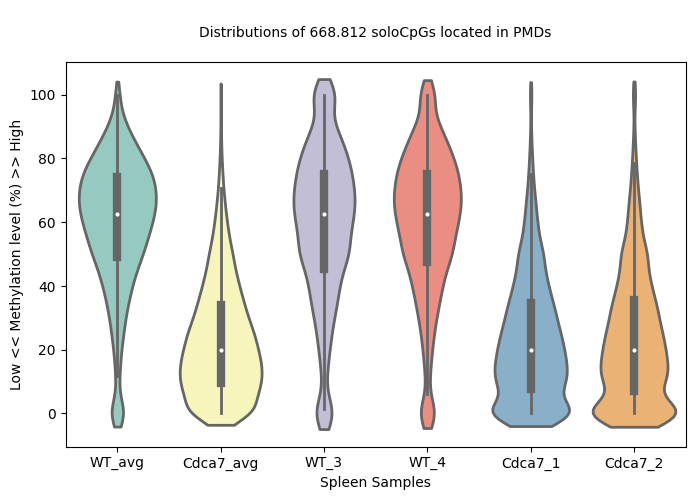

In [13]:
# Create a violinplot
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 668.812 soloCpGs located in PMDs\n", size=10, color='black')
sns.violinplot(data=df_soloPMD_3, palette="Set3", bw=.2, cut=1, linewidth=2)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

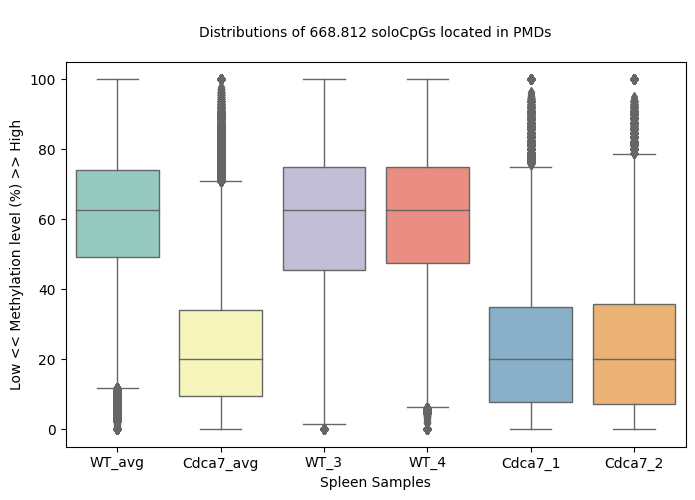

In [14]:
# Create a boxlplot
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 668.812 soloCpGs located in PMDs\n", size=10, color='black')
sns.boxplot(data=df_soloPMD_3, palette="Set3", linewidth=1, ax=ax)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

plt.show()

In [15]:
# calculate median values for each sample
print(df_soloPMD_3.median(axis=0))

WT_avg       62.605042
Cdca7_avg    20.000000
WT_3         62.500000
WT_4         62.500000
Cdca7_1      20.000000
Cdca7_2      20.000000
dtype: float64


In [16]:
# Prepare data frame to create a plot¶
df_soloHMD_3 = df_soloHMD_2[["WT_avg", "Cdca7_avg", "WT_3","WT_4", "Cdca7_1", "Cdca7_2"]]
df_soloHMD_3

,WT_avg,Cdca7_avg,WT_3,WT_4,Cdca7_1,Cdca7_2
151095,100.0,0.0,100.0,100.0,0.0,0.0
490771,100.0,0.0,100.0,100.0,0.0,0.0
68781,100.0,0.0,100.0,100.0,0.0,0.0
551259,100.0,0.0,100.0,100.0,0.0,0.0
550561,100.0,0.0,100.0,100.0,0.0,0.0
...,...,...,...,...,...,...
524693,0.0,100.0,0.0,0.0,100.0,100.0
389358,0.0,100.0,0.0,0.0,100.0,100.0
481931,0.0,100.0,0.0,0.0,100.0,100.0
343695,0.0,100.0,0.0,0.0,100.0,100.0


Text(0.5, 0, 'Spleen Samples')

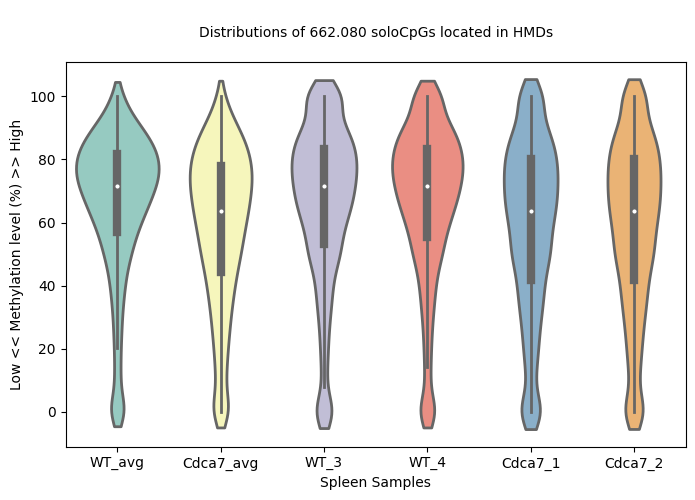

In [17]:
# Create a violinplot
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 662.080 soloCpGs located in HMDs\n", size=10, color='black')
sns.violinplot(data=df_soloHMD_3, palette="Set3", bw=.2, cut=1, linewidth=2)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

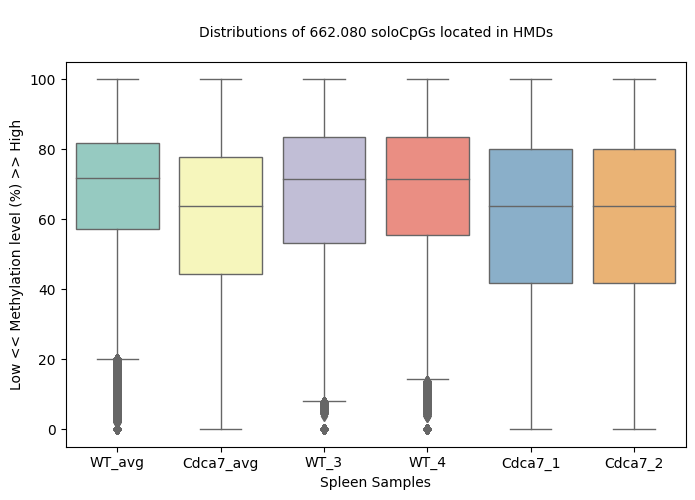

In [18]:
# Create a boxlplot
# Set the figure size with plt.subplots()
fig, ax = plt.subplots(figsize=(8, 5))

plt.title("\nDistributions of 662.080 soloCpGs located in HMDs\n", size=10, color='black')
sns.boxplot(data=df_soloHMD_3, palette="Set3", linewidth=1, ax=ax)
plt.ylabel("Low << Methylation level (%) >> High", fontsize=10)
plt.xlabel("Spleen Samples", fontsize=10)

plt.show()

In [19]:
# calculate median values for each sample
print(df_soloHMD_3.median(axis=0))

WT_avg       71.666666
Cdca7_avg    63.750000
WT_3         71.428600
WT_4         71.428600
Cdca7_1      63.636400
Cdca7_2      63.636400
dtype: float64
